In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def names_data(step):
    names_by_year = {}
    for year in range(1900, 2000, step):
        names_by_year[year] = pd.read_csv(
            '/Users/nicolas13/Lessons_Netology/Lesson4_2/names/yob{}.txt'.format(year),
            names=['Name','Gender','Count']
        )
    names_all = pd.concat(names_by_year, names=['Year', 'Pos'])
    return names_all

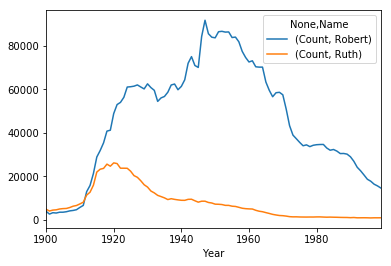

In [3]:
name_dynamics_1 = (names_data(1).groupby([names_data(1).index.get_level_values(0),'Name']).sum().query('Name == ["Ruth", "Robert"]').unstack('Name')).plot()

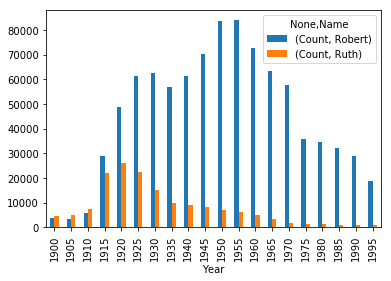

In [4]:
name_dynamics_2 = (names_data(5).groupby([names_data(5).index.get_level_values(0),'Name']).sum().query('Name == ["Ruth", "Robert"]').unstack('Name')).plot.bar()

In [5]:
names_1950 = pd.read_csv(
    '/Users/nicolas13/Lessons_Netology/Lesson4_2/names/yob1950.txt',
    names = ['Name', 'Gender', 'Count']
)

In [6]:
r_names_1950 = names_1950[names_1950['Name'].str.contains("R")]
r_names_1950.groupby('Name').sum().sort_values(by='Count', ascending=False).unstack('Name').head(10)

       Name   
Count  Robert     83778
       Richard    51111
       Ronald     29985
       Roger      12578
       Raymond    11218
       Rebecca     9443
       Ruth        7138
       Roy         6491
       Rita        6439
       Ralph       6421
dtype: int64

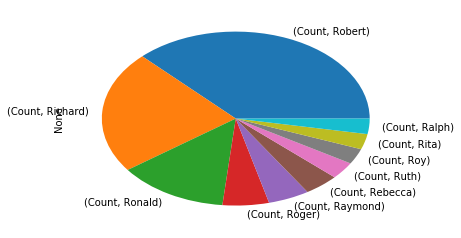

In [7]:
r_names_1950.groupby('Name').sum().sort_values(by='Count', ascending=False).unstack('Name').head(10).plot.pie(x='Name',y='Count',)

In [89]:
names = names_data(1).groupby([names_data(1).index.get_level_values(0),'Name']).sum().reset_index().sort_values(by='Count', ascending=False)
names.head(5)

,Year,Name,Count
344576,1947,Linda,99900
353781,1948,Linda,96418
343347,1947,James,95019
442068,1957,Michael,92970
346716,1947,Robert,91877


In [90]:
def anti_vowel(row):
    vowels = 'aeoiuyAEOIUY'
    row.Name = sum(letter not in vowels for letter in row.Name)
    return row

In [91]:
names_by_len = names.apply(anti_vowel, axis=1)
names_by_len.head(5)

,Year,Name,Count
344576,1947,3,99900
353781,1948,3,96418
343347,1947,3,95019
442068,1957,4,92970
346716,1947,4,91877


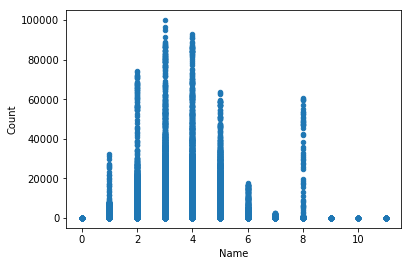

In [92]:
names_by_len.reset_index().sort_values(by="Name").plot.scatter(x='Name', y='Count')